# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


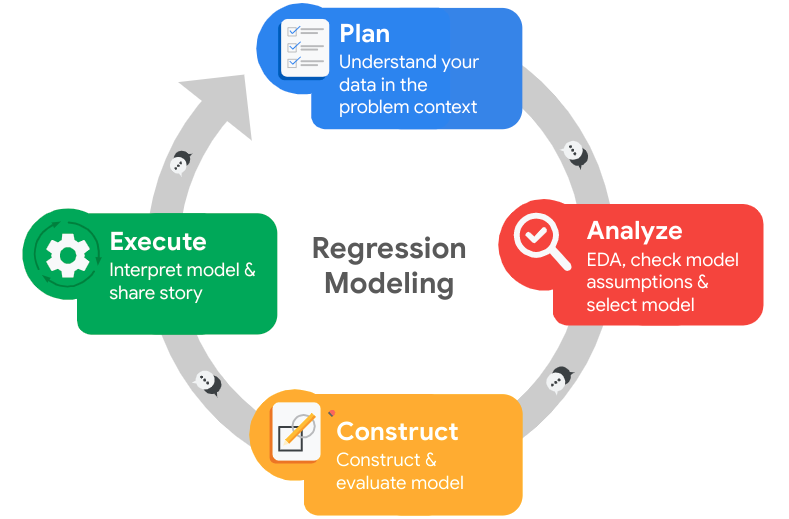

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project? The stakeholders are the Human Resources (HR) department, the company employers
- What are you trying to solve or accomplish? we are going to develope eather an regression model or Machine learning model to predict where an employe leave the company
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8) # Default figure size

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
# Display the shape of the dataset (rows, columns)
print("--- Step 1: Basic Information ---")
print(f"\nShape of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")

# Display general information about the dataset, including data types and non-null values
print("\nDataset Info:")
df.info()


--- Step 1: Basic Information ---

Shape of the dataset: 14999 rows, 10 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
print("\n--- Step 2: Descriptive Statistics ---")
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print()
# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include='object'))



--- Step 2: Descriptive Statistics ---

Descriptive statistics for numerical columns:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000       

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
print("\n--- Step 3: Renaming Columns ---")
# Inspect current column names for standardization
print("\nOriginal Column Names:")
print(df.columns.tolist())



--- Step 3: Renaming Columns ---

Original Column Names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [6]:
# Define a mapping for renaming columns to snake_case and more concise names
# Based on inspection, column names seem reasonable, will just standardize to snake_case.
# 'satisfaction_level' -> 'satisfaction_level' (already good)
# 'last_evaluation' -> 'last_evaluation' (already good)
# 'number_project' -> 'number_of_projects' (more explicit)
# 'average_montly_hours' -> 'average_monthly_hours' (corrected spelling)
# 'time_spend_company' -> 'years_at_company' (more concise/clear)
# 'Work_accident' -> 'work_accident' (snake_case)
# 'left' -> 'left' (already good)
# 'promotion_last_5years' -> 'promotion_last_5years' (already good)
# 'department' -> 'department' (already good)
# 'salary' -> 'salary' (already good)

new_column_names = {
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'number_project': 'number_of_projects'
}
df = df.rename(columns=new_column_names)

print("\nNew Column Names:")
print(df.columns.tolist())



New Column Names:
['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company', 'work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


### Check missing values

Check for any missing values in the data.

In [7]:
# --- Step 4: Check missing values ---
print("\n--- Step 4: Checking Missing Values ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})
print(missing_info[missing_info['Missing Count'] > 0])

if missing_info['Missing Count'].sum() == 0:
    print("No missing values found in the dataset.")



--- Step 4: Checking Missing Values ---
Empty DataFrame
Columns: [Missing Count, Missing Percentage (%)]
Index: []
No missing values found in the dataset.


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# --- Step 5: Check duplicates ---
print("\n--- Step 5: Checking Duplicates ---")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")



--- Step 5: Checking Duplicates ---
Number of duplicate rows: 3008


In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed
if num_duplicates > 0:
    print(f"Dropping {num_duplicates} duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"Dataset shape after dropping duplicates: {df.shape[0]} rows, {df.shape[1]} columns")
else:
    print("No duplicate rows found.")


# Display first few rows of new dataframe as needed
df


Dropping 3008 duplicate rows...
Dataset shape after dropping duplicates: 11991 rows, 10 columns


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.


--- Step 6: Checking Outliers ---

Numerical columns for outlier checking: ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company']


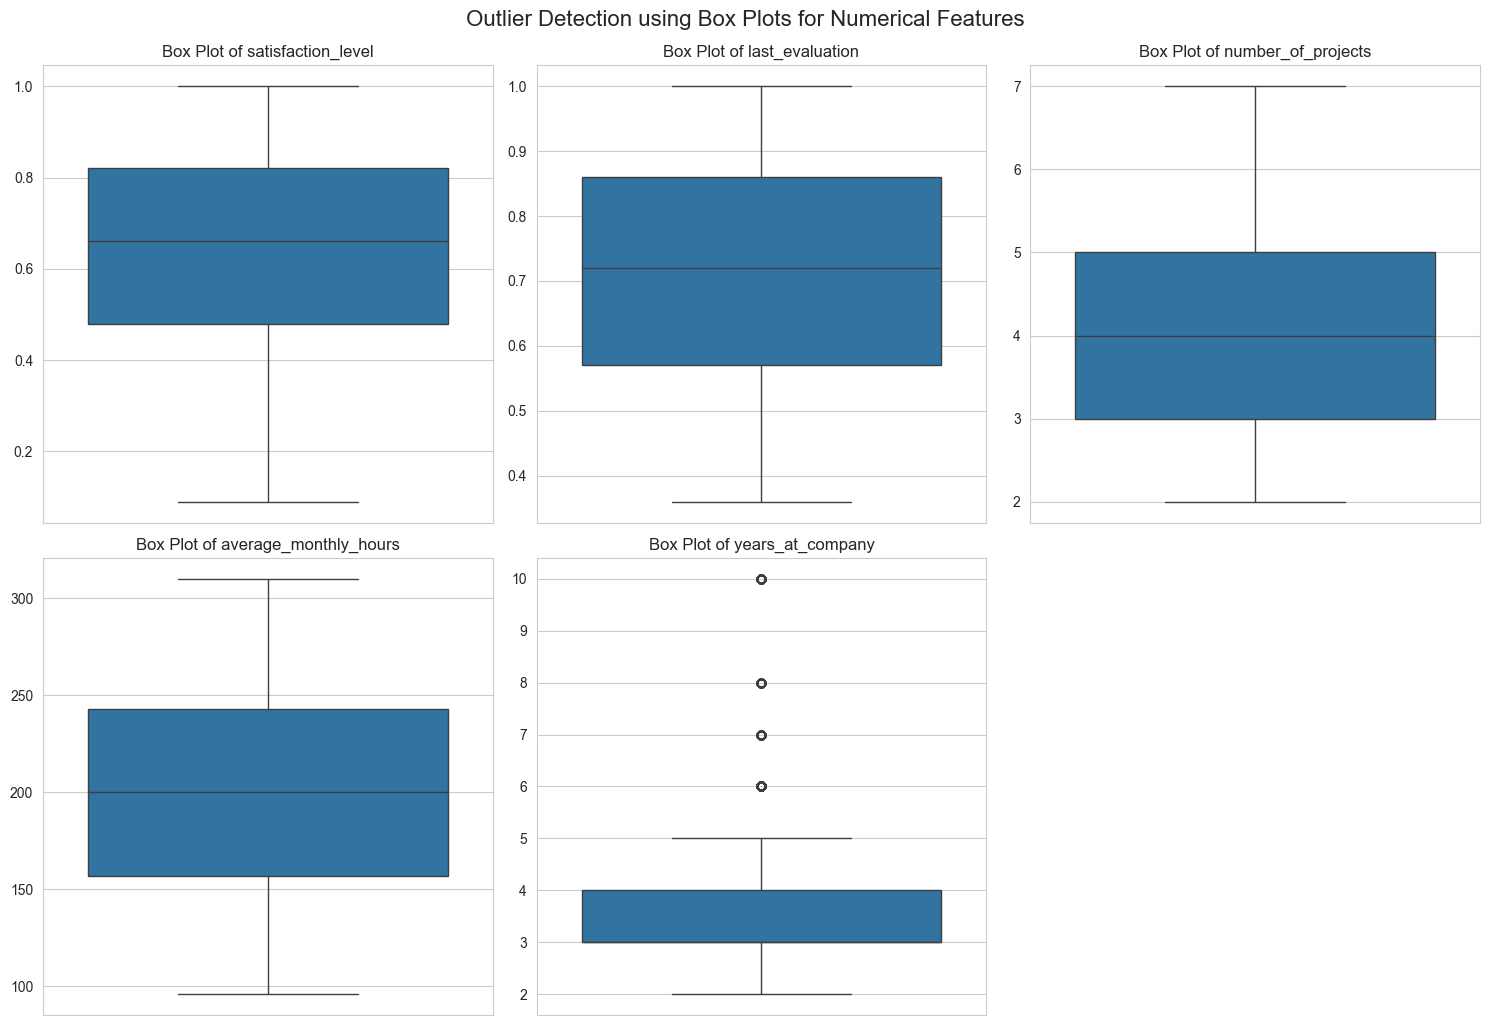

In [10]:
# --- Step 6: Check outliers (using box plots and IQR method) ---
print("\n--- Step 6: Checking Outliers ---")
# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns if they are not truly numerical for outlier analysis (e.g., 'left', 'work_accident', 'promotion_last_5years')
# Assuming 'left', 'work_accident', 'promotion_last_5years' are binary indicators (0 or 1)
outlier_numerical_cols = [col for col in numerical_cols if col not in ['left', 'work_accident', 'promotion_last_5years']]

print(f"\nNumerical columns for outlier checking: {outlier_numerical_cols}")

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Outlier Detection using Box Plots for Numerical Features', y=1.02, fontsize=16)
plt.show()



In [11]:
# Determine the number of rows containing outliers using the IQR method
print("\n--- Outlier Quantification (IQR Method) ---")
outlier_rows_mask = pd.Series([False] * len(df), index=df.index)

for col in outlier_numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current column
    column_outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f"Column '{col}': {column_outliers_mask.sum()} outliers detected.")

    # Update the overall outlier_rows_mask if this row has an outlier in the current column
    outlier_rows_mask = outlier_rows_mask | column_outliers_mask

total_rows_with_outliers = outlier_rows_mask.sum()
print(f"\nTotal number of rows containing at least one outlier: {total_rows_with_outliers}")
print(f"Percentage of rows with outliers: {(total_rows_with_outliers / len(df)) * 100:.2f}%")




--- Outlier Quantification (IQR Method) ---
Column 'satisfaction_level': 0 outliers detected.
Column 'last_evaluation': 0 outliers detected.
Column 'number_of_projects': 0 outliers detected.
Column 'average_monthly_hours': 0 outliers detected.
Column 'years_at_company': 824 outliers detected.

Total number of rows containing at least one outlier: 824
Percentage of rows with outliers: 6.87%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables? 
    - there are not a great relationship between the numerical columns, we can´t observe it
- What do you observe about the distributions in the data?
    - we found only one column with ouliers, this columns is call as **years_at_company**, it has 824 outliers raw, who represent a 6,87% of raws with outliers, certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.
    - we found 3008 duplicated rows, and we decided remove this raws.
- What transformations did you make with your data? Why did you chose to make those decisions? 
    - We Defined a mapping for renaming columns to snake_case to get more concise names.
- What are some purposes of EDA before constructing a predictive model?
- 🔍 **1. Understand the Data Structure**
    - Identify data types (numeric, categorical, text, etc.).

    - Check for missing values and duplicates.

    - Spot data entry errors or inconsistencies.

- 📊 **2. Visualize Distributions and Relationships**
    - Use histograms, boxplots, scatterplots, and correlation matrices.

    - Helps detect skewed distributions, outliers, or non-linear relationships.

    - Identify which features are most related to the target variable.

- 🧮 **3. Assess Feature Importance or Relevance**
    - Understand which variables might influence the target variable.

    - Reduce noise and improve model performance by selecting the most useful features.

- ⚠️ **4. Detect Data Quality Issues**
    - Spot missing values and decide how to handle them (drop, impute, etc.).

    - Identify outliers or anomalies that could skew model results.

    - Ensure consistent units and formatting.

- 🧠 **5. Evaluate Assumptions (especially for regression)**
    - Linearity, normality of residuals, and homoscedasticity.

    - Helps decide if feature transformations (e.g., log, square root) are needed.

- 🧪 **6. Guide Feature Engineering**
    - Create new features or transform existing ones based on domain knowledge or patterns seen in EDA.

- 🔄 **7. Inform Model Selection**
    - Understanding distributions and interactions can guide whether linear models, tree-based models, or ensemble methods are more appropriate.

- 📉 **8. Detect Multicollinearity**
    - Identify highly correlated features that could affect regression and degrade interpretability.





[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.


--- Step 7: Data Exploration - Employee Turnover ---

Number of employees who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left vs. stayed:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5676\2363823787.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='viridis')


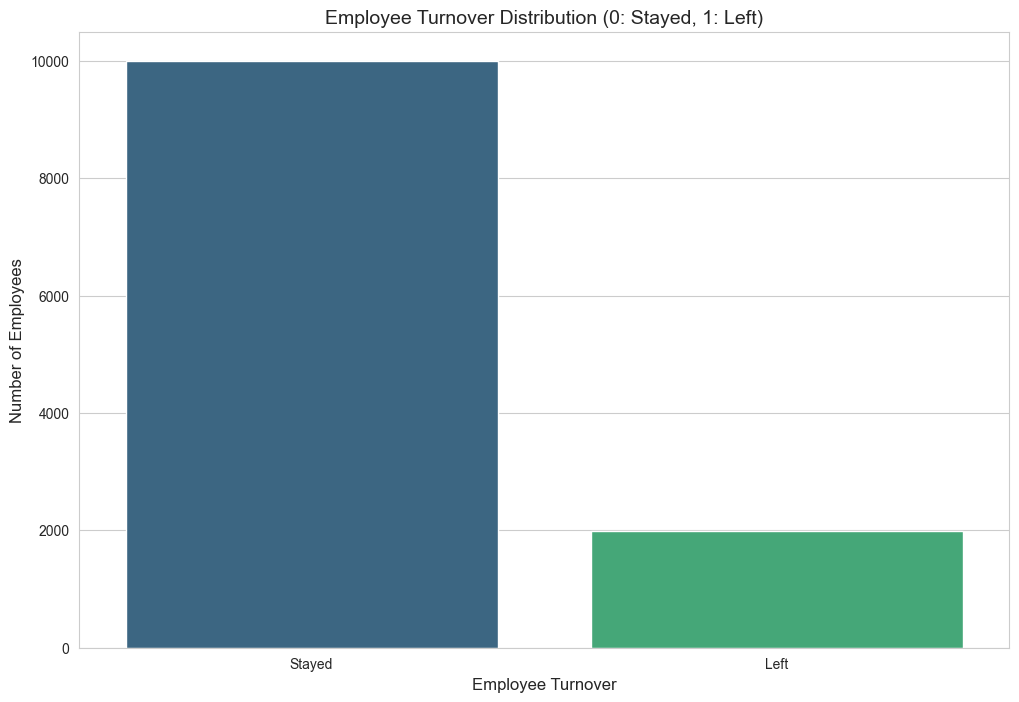

In [12]:
# --- Step 7: Data exploration (Understanding Turnover) ---
print("\n--- Step 7: Data Exploration - Employee Turnover ---")
# Count employees who left (left = 1) and who stayed (left = 0)
turnover_counts = df['left'].value_counts()
print("\nNumber of employees who left vs. stayed:")
print(turnover_counts)

# Calculate the percentage of employees who left
turnover_percentage = df['left'].value_counts(normalize=True) * 100
print("\nPercentage of employees who left vs. stayed:")
print(turnover_percentage)

# Visualize turnover
sns.countplot(x='left', data=df, palette='viridis')
plt.title('Employee Turnover Distribution (0: Stayed, 1: Left)', fontsize=14)
plt.xlabel('Employee Turnover', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.show()


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.


--- Step 8: Data Visualizations ---


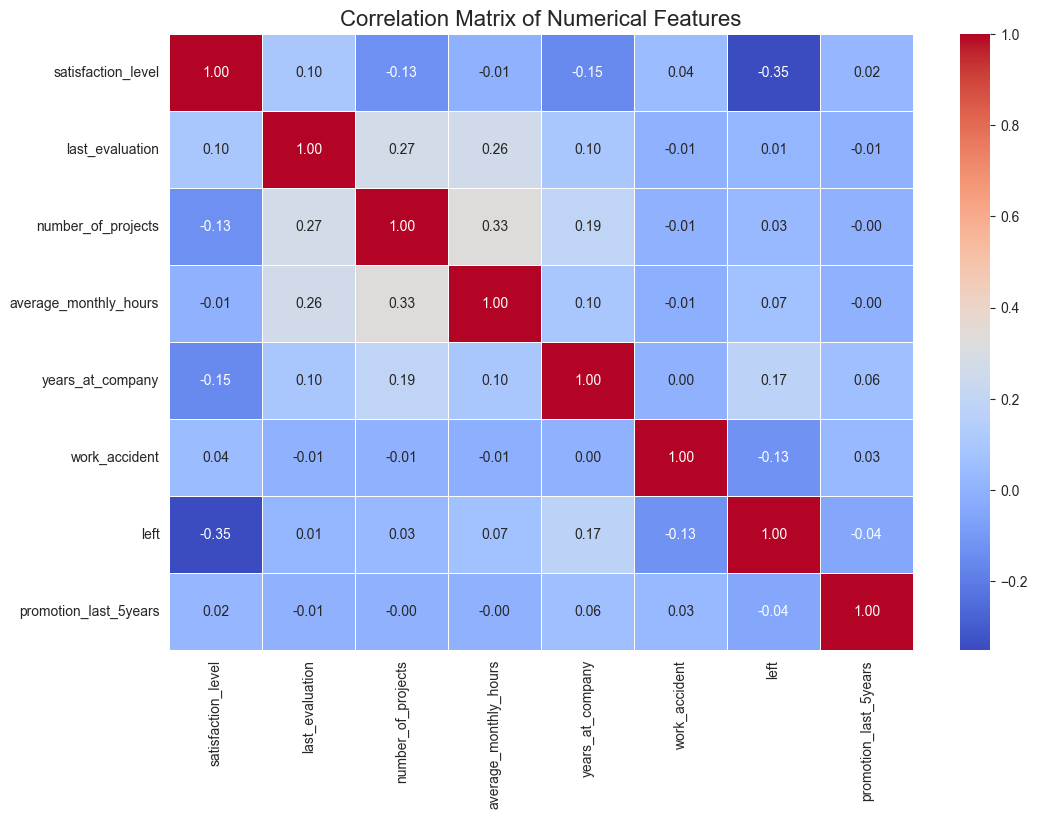

In [13]:
# --- Step 8: Data visualizations (relationships between variables) ---
print("\n--- Step 8: Data Visualizations ---")

# Correlation Matrix for Numerical Features
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


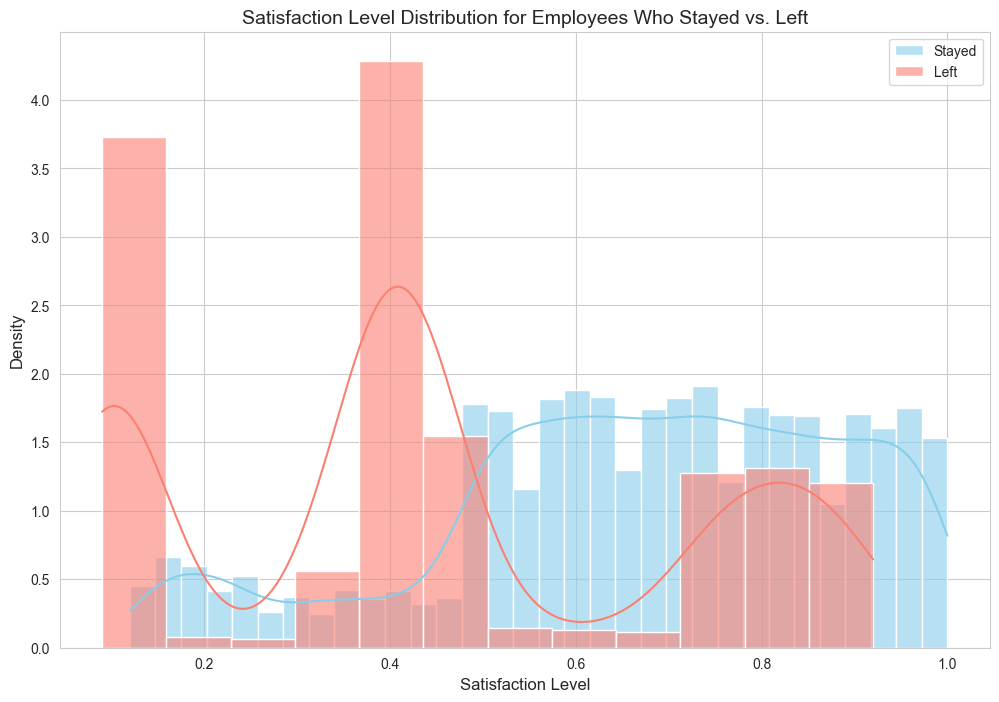

In [14]:
# 1. Satisfaction Level vs. Turnover
sns.histplot(df[df['left'] == 0]['satisfaction_level'], color='skyblue', kde=True, label='Stayed', stat='density', alpha=0.6)
sns.histplot(df[df['left'] == 1]['satisfaction_level'], color='salmon', kde=True, label='Left', stat='density', alpha=0.6)
plt.title('Satisfaction Level Distribution for Employees Who Stayed vs. Left', fontsize=14)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


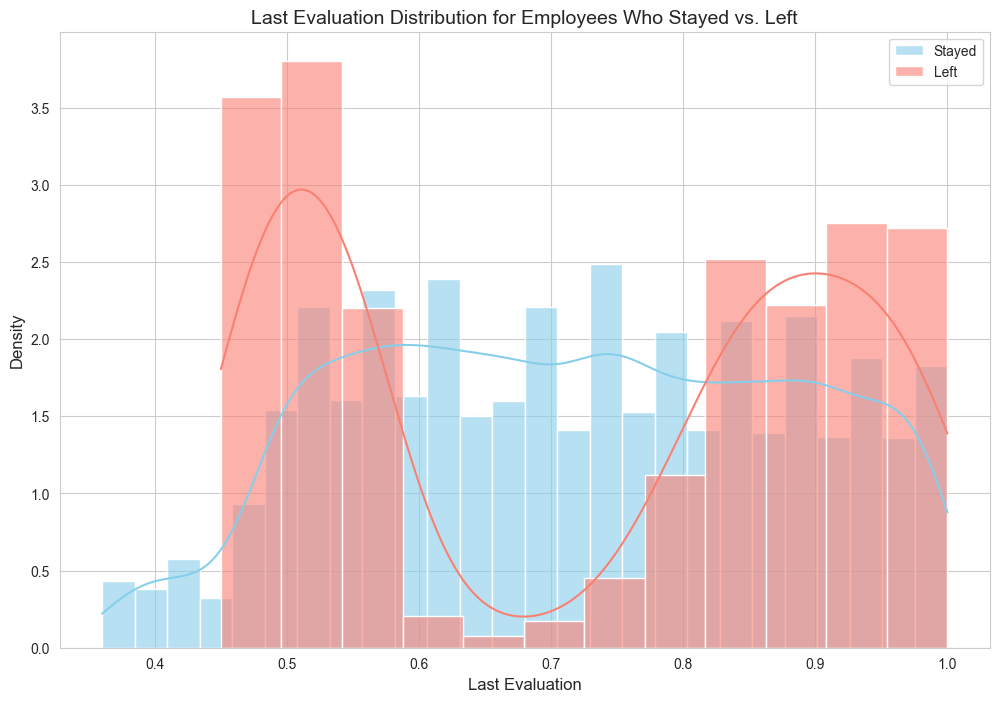

In [15]:
# 2. Last Evaluation vs. Turnover
sns.histplot(df[df['left'] == 0]['last_evaluation'], color='skyblue', kde=True, label='Stayed', stat='density', alpha=0.6)
sns.histplot(df[df['left'] == 1]['last_evaluation'], color='salmon', kde=True, label='Left', stat='density', alpha=0.6)
plt.title('Last Evaluation Distribution for Employees Who Stayed vs. Left', fontsize=14)
plt.xlabel('Last Evaluation', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


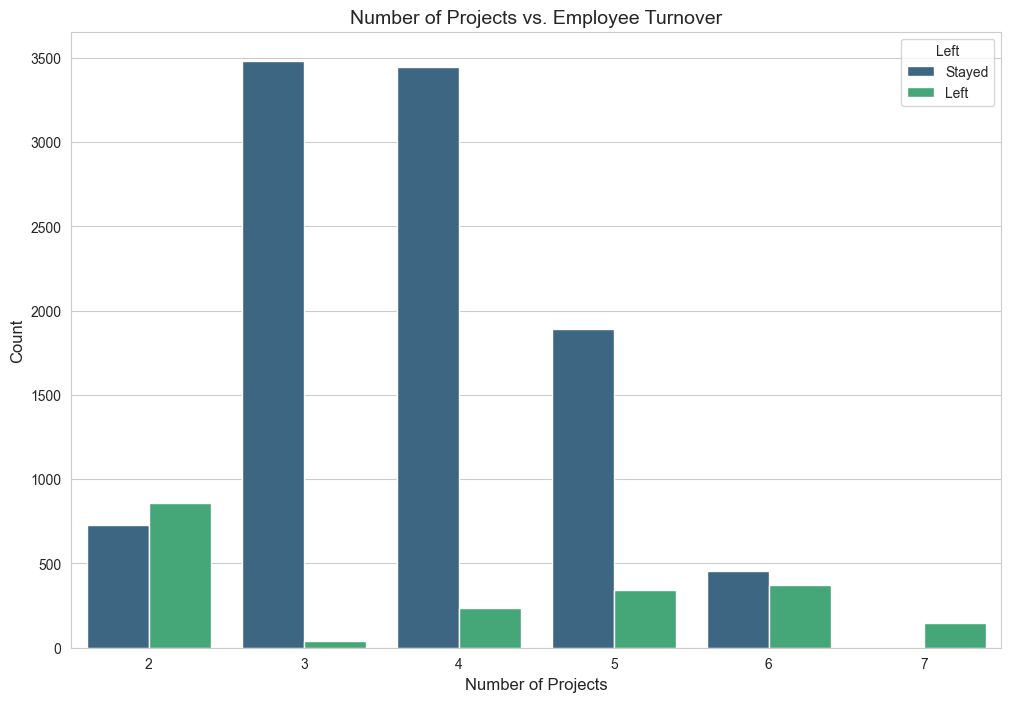

In [16]:
# 3. Number of Projects vs. Turnover
sns.countplot(x='number_of_projects', hue='left', data=df, palette='viridis')
plt.title('Number of Projects vs. Employee Turnover', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


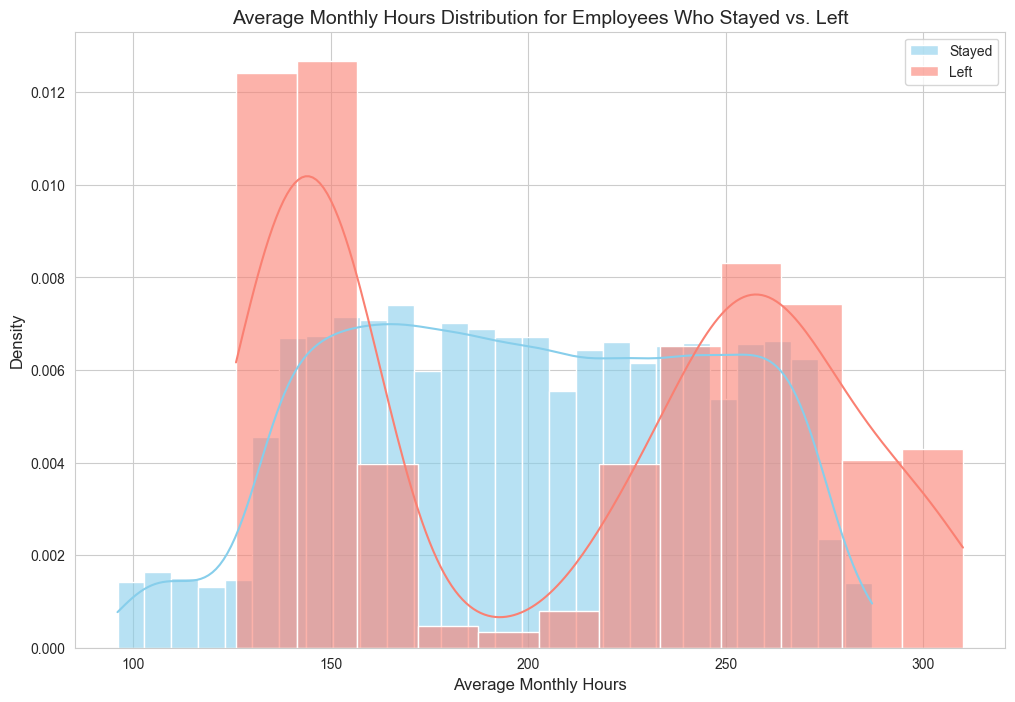

In [17]:
# 4. Average Monthly Hours vs. Turnover
sns.histplot(df[df['left'] == 0]['average_monthly_hours'], color='skyblue', kde=True, label='Stayed', stat='density', alpha=0.6)
sns.histplot(df[df['left'] == 1]['average_monthly_hours'], color='salmon', kde=True, label='Left', stat='density', alpha=0.6)
plt.title('Average Monthly Hours Distribution for Employees Who Stayed vs. Left', fontsize=14)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


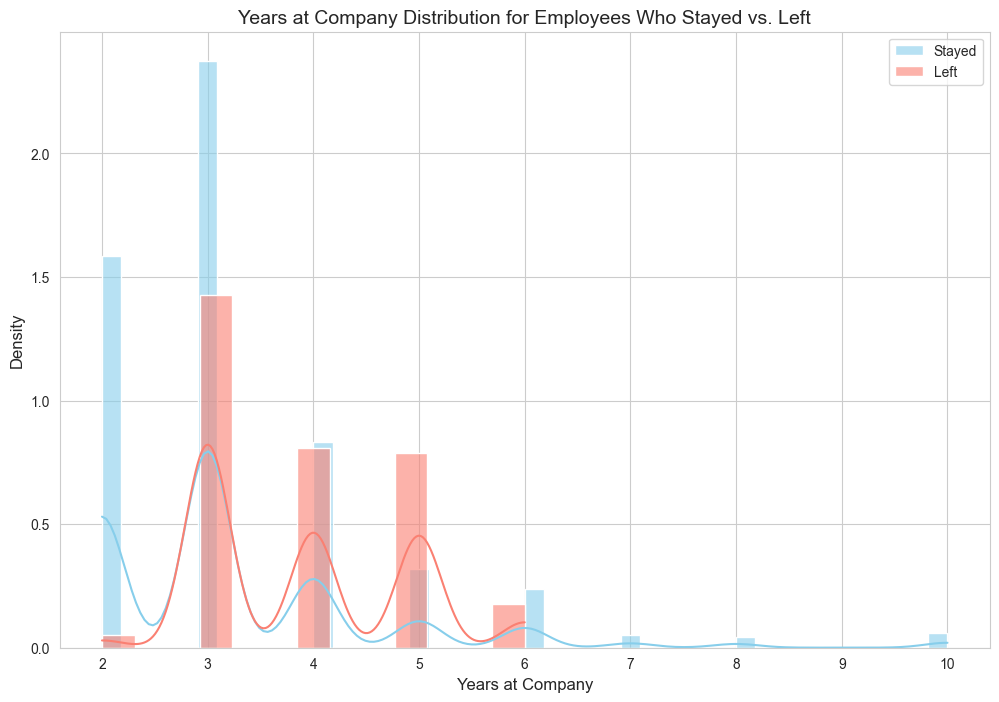

In [18]:
# 5. Years at Company vs. Turnover
sns.histplot(df[df['left'] == 0]['years_at_company'], color='skyblue', kde=True, label='Stayed', stat='density', alpha=0.6)
sns.histplot(df[df['left'] == 1]['years_at_company'], color='salmon', kde=True, label='Left', stat='density', alpha=0.6)
plt.title('Years at Company Distribution for Employees Who Stayed vs. Left', fontsize=14)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


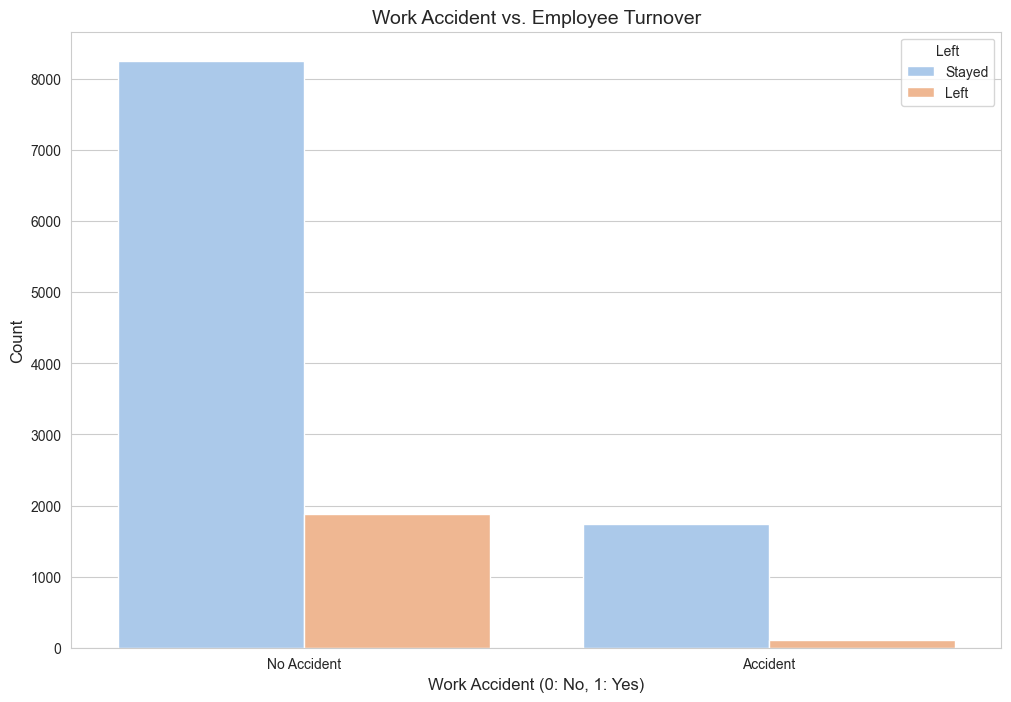

In [19]:
# 6. Work Accident vs. Turnover
sns.countplot(x='work_accident', hue='left', data=df, palette='pastel')
plt.title('Work Accident vs. Employee Turnover', fontsize=14)
plt.xlabel('Work Accident (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.xticks(ticks=[0, 1], labels=['No Accident', 'Accident'])
plt.show()


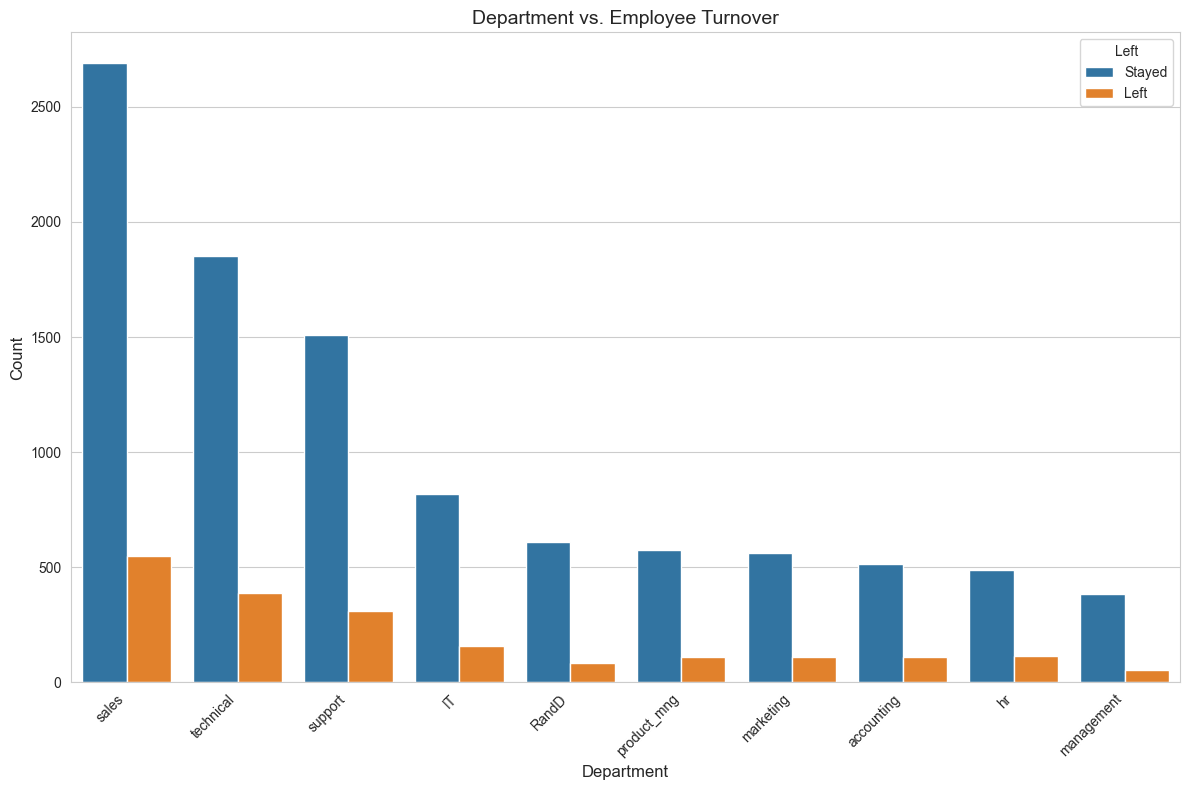

In [20]:
# 8. Department vs. Turnover
sns.countplot(x='Department', hue='left', data=df, palette='tab10', order=df['Department'].value_counts().index)
plt.title('Department vs. Employee Turnover', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()


### Insights

- The number of employees who stayed and left was 10,000 versus 1,991, which corresponds to a retention rate of 83.39% versus 16.60%.
- The most significant correlation between the two variables is the average monthly hours versus the number of projects: 0.33.
- Those with a 50% to 90% satisfaction ratio are more likely to stay.
- The number of employees (almost 3,500) who have developed 3 or 4 projects per month is more likely to stay.
- Employees who have been with the company for 2 to 3 years are more likely to stay.
- The department with the highest number of employees who remain is sales, with almost 3,000, and management, with less than 500. Among the sales, technical, support, and IT departments, 80% of employees are most likely to stay.
- Employees who do not have accidents are more likely to stay, with more than 8,000.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [21]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.